In [130]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')


In [131]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

In [132]:
xsize

960

In [155]:
# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200


In [156]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]


In [157]:
# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE

left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]



In [158]:

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)

In [159]:
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [160]:
fit_left

array([ -4.61052632e-01,   5.39000000e+02])

In [161]:
fit_right

array([  0.51529412,  75.23529412])

In [162]:
fit_bottom

array([ -6.31593543e-17,   5.39000000e+02])

In [163]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])
color_thresholds

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [164]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
XX.shape

                    

(540, 960)

In [165]:
XX

array([[  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       ..., 
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959]])

In [166]:
YY

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ..., 
       [537, 537, 537, ..., 537, 537, 537],
       [538, 538, 538, ..., 538, 538, 538],
       [539, 539, 539, ..., 539, 539, 539]])

In [167]:
np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

[array([[  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        ..., 
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ..., 
        [537, 537, 537, ..., 537, 537, 537],
        [538, 538, 538, ..., 538, 538, 538],
        [539, 539, 539, ..., 539, 539, 539]])]

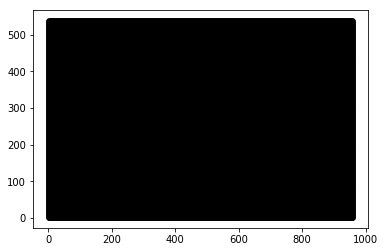

In [168]:
plt.plot(XX,YY, marker='.', color='k', linestyle='none')
plt.show()

In [169]:
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [170]:
XX*fit_left[0] 

array([[  -0.        ,   -0.46105263,   -0.92210526, ..., -441.22736842,
        -441.68842105, -442.14947368],
       [  -0.        ,   -0.46105263,   -0.92210526, ..., -441.22736842,
        -441.68842105, -442.14947368],
       [  -0.        ,   -0.46105263,   -0.92210526, ..., -441.22736842,
        -441.68842105, -442.14947368],
       ..., 
       [  -0.        ,   -0.46105263,   -0.92210526, ..., -441.22736842,
        -441.68842105, -442.14947368],
       [  -0.        ,   -0.46105263,   -0.92210526, ..., -441.22736842,
        -441.68842105, -442.14947368],
       [  -0.        ,   -0.46105263,   -0.92210526, ..., -441.22736842,
        -441.68842105, -442.14947368]])

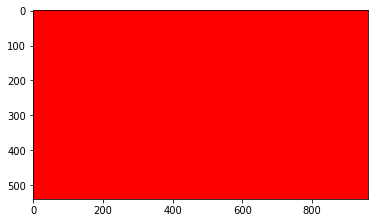

In [171]:
line_image[region_thresholds] = [255, 0, 0]
plt.imshow(line_image)
plt.show()

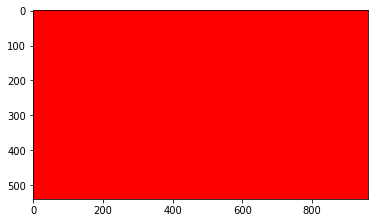

In [172]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] > rgb_threshold[0]) | \
                    (image[:,:,1] > rgb_threshold[1]) | \
                    (image[:,:,2] > rgb_threshold[2])

line_image[color_thresholds] = [255, 0, 0]
plt.imshow(line_image)
plt.show()

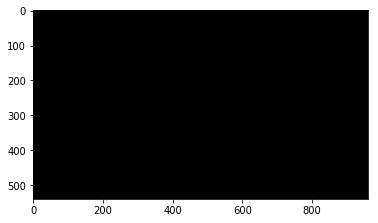

In [173]:
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
plt.imshow(color_select)
plt.show()




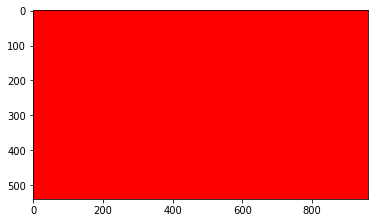

In [176]:

# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
plt.imshow(line_image)
plt.show()

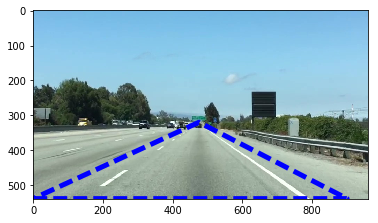

In [175]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=5)
plt.show()
